In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

# part a

In [343]:
gray_trump = cv2.imread('P5/donald_in_car_1.png')
gray_trump = cv2.cvtColor(gray_trump, cv.COLOR_BGR2GRAY)
colored_trump = cv2.imread('P5/donald_in_car_2.png')
colored_trump = cv2.cvtColor(colored_trump, cv.COLOR_BGR2RGB)

In [49]:
h1 = cv2.imread('P5/kernel_1.png')
h1 = cv2.cvtColor(h1 , cv.COLOR_BGR2GRAY)

h2 = cv2.imread('P5/kernel_2.png')
h2 = cv2.cvtColor(h2 , cv.COLOR_BGR2GRAY)

h3 = cv2.imread('P5/kernel_3.png')
h3 = cv2.cvtColor(h3 , cv.COLOR_BGR2GRAY)

h4 = cv2.imread('P5/kernel_4.png')
h4 = cv2.cvtColor(h4 , cv.COLOR_BGR2GRAY)

In [50]:
def zero_pad(image, shape, position='corner'):
    """
    Extends image to a certain size with zeros
    Parameters
    ----------
    image: real 2d `numpy.ndarray`
        Input image
    shape: tuple of int
        Desired output shape of the image
    position : str, optional
        The position of the input image in the output one:
            * 'corner'
                top-left corner (default)
            * 'center'
                centered
    Returns
    -------
    padded_img: real `numpy.ndarray`
        The zero-padded image
    """
    shape = np.asarray(shape, dtype=int)
    imshape = np.asarray(image.shape, dtype=int)

    if np.alltrue(imshape == shape):
        return image

    if np.any(shape <= 0):
        raise ValueError("ZERO_PAD: null or negative shape given")

    dshape = shape - imshape
    if np.any(dshape < 0):
        raise ValueError("ZERO_PAD: target size smaller than source one")

    pad_img = np.zeros(shape, dtype=image.dtype)

    idx, idy = np.indices(imshape)

    if position == 'center':
        if np.any(dshape % 2 != 0):
            raise ValueError("ZERO_PAD: source and target shapes "
                             "have different parity.")
        offx, offy = dshape // 2
    else:
        offx, offy = (0, 0)

    pad_img[idx + offx, idy + offy] = image

    return pad_img

def psf2otf(psf, shape):
    """
    Convert point-spread function to optical transfer function.
    Compute the Fast Fourier Transform (FFT) of the point-spread
    function (PSF) array and creates the optical transfer function (OTF)
    array that is not influenced by the PSF off-centering.
    By default, the OTF array is the same size as the PSF array.
    To ensure that the OTF is not altered due to PSF off-centering, PSF2OTF
    post-pads the PSF array (down or to the right) with zeros to match
    dimensions specified in OUTSIZE, then circularly shifts the values of
    the PSF array up (or to the left) until the central pixel reaches (1,1)
    position.
    Parameters
    ----------
    psf : `numpy.ndarray`
        PSF array
    shape : int
        Output shape of the OTF array
    Returns
    -------
    otf : `numpy.ndarray`
        OTF array
    Notes
    -----
    Adapted from MATLAB psf2otf function
    """
    if np.all(psf == 0):
        return np.zeros_like(psf)

    inshape = psf.shape
    # Pad the PSF to outsize
    psf = zero_pad(psf, shape, position='corner')

    # Circularly shift OTF so that the 'center' of the PSF is
    # [0,0] element of the array
    for axis, axis_size in enumerate(inshape):
        psf = np.roll(psf, -int(axis_size / 2), axis=axis)

    # Compute the OTF
    otf = np.fft.fft2(psf)

    # Estimate the rough number of operations involved in the FFT
    # and discard the PSF imaginary part if within roundoff error
    # roundoff error  = machine epsilon = sys.float_info.epsilon
    # or np.finfo().eps
    n_ops = np.sum(psf.size * np.log2(psf.shape))
    otf = np.real_if_close(otf, tol=n_ops)

    return otf


In [69]:
import numpy as np
from scipy.fftpack import fftn, ifftn

def psf2otf(psf, otf_size):
    # calculate otf from psf with size >= psf size
    
    if psf.any(): # if any psf element is non-zero    
        # pad PSF with zeros up to image size  
        pad_size = ((0,otf_size[0]-psf.shape[0]),(0,otf_size[1]-psf.shape[1]))
        psf_padded = np.pad(psf, pad_size, 'constant')    
        
        # circularly shift psf   
        psf_padded = np.roll(psf_padded, -int(np.floor(psf.shape[0]/2)), axis=0)    
        psf_padded = np.roll(psf_padded, -int(np.floor(psf.shape[1]/2)), axis=1)       
       
       #calculate otf    
        otf = fftn(psf_padded)
        # this condition depends on psf size    
        num_small = np.log2(psf.shape[0])*4*np.spacing(1)    
        if np.max(abs(otf.imag))/np.max(abs(otf)) <= num_small:
            otf = otf.real 
    else: # if all psf elements are zero
        otf = np.zeros(otf_size)
    return otf

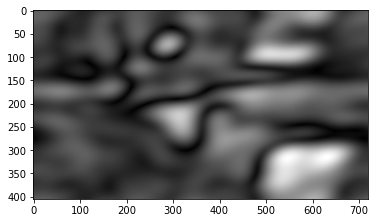

In [171]:
otf_kernel = psf2otf(h1, (405,720))
fft_image = np.fft.fft2(gray_trump)

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf = np.fft.ifft2(fft_result_psf2otf)

plt.imshow(np.abs(result_psf2otf),cmap='gray')
gray_trump_blurred_1 = np.abs(result_psf2otf)

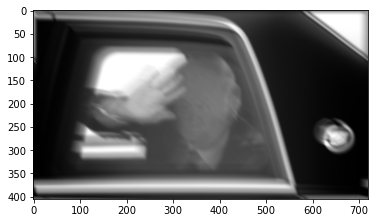

In [113]:
otf_kernel = psf2otf(h2, (405,720))
fft_image = np.fft.fft2(gray_trump)

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)


result_psf2otf = np.fft.ifft2(fft_result_psf2otf)

plt.imshow(np.abs(result_psf2otf),cmap='gray')

gray_trump_blurred_2 = np.abs(result_psf2otf)

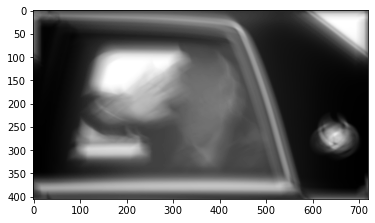

In [114]:
otf_kernel = psf2otf(h3, (405,720))
fft_image = np.fft.fft2(gray_trump)

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)


result_psf2otf = np.fft.ifft2(fft_result_psf2otf)

plt.imshow(np.abs(result_psf2otf),cmap='gray')

gray_trump_blurred_3 = np.abs(result_psf2otf)

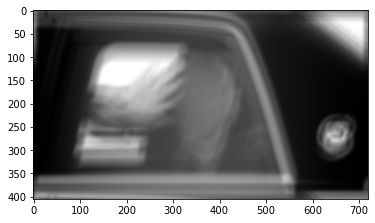

In [152]:
otf_kernel = psf2otf(h4, (405,720))
fft_image = np.fft.fft2(gray_trump)

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)


result_psf2otf = np.fft.ifft2(fft_result_psf2otf)

plt.imshow(np.abs(result_psf2otf),cmap='gray')

gray_trump_blurred_4 = np.abs(result_psf2otf)

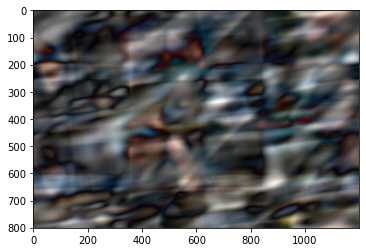

In [116]:
otf_kernel = psf2otf(h1,(801,1200))
fft_image = np.fft.fft2(colored_trump[:,:,0])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf0 = np.fft.ifft2(fft_result_psf2otf)


fft_image = np.fft.fft2(colored_trump[:,:,1])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf1 = np.fft.ifft2(fft_result_psf2otf)


fft_image = np.fft.fft2(colored_trump[:,:,2])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf2 = np.fft.ifft2(fft_result_psf2otf)


r_ch = np.abs(result_psf2otf0)
g_ch = np.abs(result_psf2otf1)
b_ch = np.abs(result_psf2otf2)

def normalize(image):
    return (image-image.min())/(image.max()-image.min())


r_ch = normalize(r_ch)
g_ch = normalize(g_ch)
b_ch = normalize(b_ch)

needed_multi_channel_img = np.zeros((801, 1200, 3))



needed_multi_channel_img [:,:,0] = r_ch
needed_multi_channel_img [:,:,1] = g_ch
needed_multi_channel_img [:,:,2] = b_ch
plt.imshow(needed_multi_channel_img)

colored_trump_blurred_1 = needed_multi_channel_img

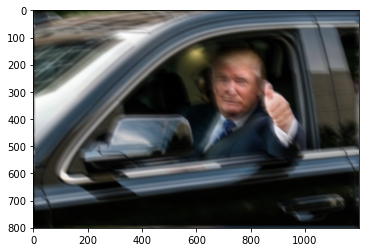

In [117]:
otf_kernel = psf2otf(h2,(801,1200))
fft_image = np.fft.fft2(colored_trump[:,:,0])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf0 = np.fft.ifft2(fft_result_psf2otf)

otf_kernel = psf2otf(h2,(801,1200))
fft_image = np.fft.fft2(colored_trump[:,:,1])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf1 = np.fft.ifft2(fft_result_psf2otf)

otf_kernel = psf2otf(h2,(801,1200))
fft_image = np.fft.fft2(colored_trump[:,:,2])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf2 = np.fft.ifft2(fft_result_psf2otf)


r_ch = np.abs(result_psf2otf0)
g_ch = np.abs(result_psf2otf1)
b_ch = np.abs(result_psf2otf2)

def normalize(image):
    return (image-image.min())/(image.max()-image.min())


r_ch = normalize(r_ch)
g_ch = normalize(g_ch)
b_ch = normalize(b_ch)

needed_multi_channel_img = np.zeros((801, 1200, 3))



needed_multi_channel_img [:,:,0] = r_ch
needed_multi_channel_img [:,:,1] = g_ch
needed_multi_channel_img [:,:,2] = b_ch
plt.imshow(needed_multi_channel_img)

colored_trump_blurred_2 = needed_multi_channel_img

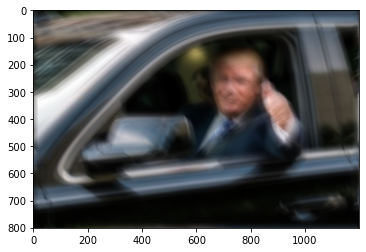

In [118]:
otf_kernel = psf2otf(h3,(801,1200))
fft_image = np.fft.fft2(colored_trump[:,:,0])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf0 = np.fft.ifft2(fft_result_psf2otf)


fft_image = np.fft.fft2(colored_trump[:,:,1])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf1 = np.fft.ifft2(fft_result_psf2otf)


fft_image = np.fft.fft2(colored_trump[:,:,2])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf2 = np.fft.ifft2(fft_result_psf2otf)


r_ch = np.abs(result_psf2otf0)
g_ch = np.abs(result_psf2otf1)
b_ch = np.abs(result_psf2otf2)

def normalize(image):
    return (image-image.min())/(image.max()-image.min())


r_ch = normalize(r_ch)
g_ch = normalize(g_ch)
b_ch = normalize(b_ch)

needed_multi_channel_img = np.zeros((801, 1200, 3))



needed_multi_channel_img [:,:,0] = r_ch
needed_multi_channel_img [:,:,1] = g_ch
needed_multi_channel_img [:,:,2] = b_ch
plt.imshow(needed_multi_channel_img)

colored_trump_blurred_3 = needed_multi_channel_img

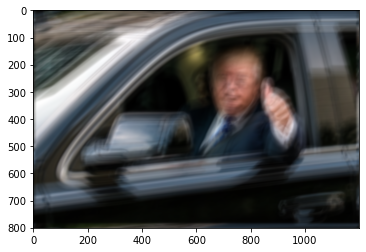

In [155]:
otf_kernel = psf2otf(h4,(801,1200))
fft_image = np.fft.fft2(colored_trump[:,:,0])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf0 = np.fft.ifft2(fft_result_psf2otf)


fft_image = np.fft.fft2(colored_trump[:,:,1])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf1 = np.fft.ifft2(fft_result_psf2otf)


fft_image = np.fft.fft2(colored_trump[:,:,2])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf2 = np.fft.ifft2(fft_result_psf2otf)


r_ch = np.abs(result_psf2otf0)
g_ch = np.abs(result_psf2otf1)
b_ch = np.abs(result_psf2otf2)

def normalize(image):
    return (image-image.min())/(image.max()-image.min())


r_ch = normalize(r_ch)
g_ch = normalize(g_ch)
b_ch = normalize(b_ch)

needed_multi_channel_img = np.zeros((801, 1200, 3))



needed_multi_channel_img [:,:,0] = r_ch
needed_multi_channel_img [:,:,1] = g_ch
needed_multi_channel_img [:,:,2] = b_ch
plt.imshow(needed_multi_channel_img)

colored_trump_blurred_4 = needed_multi_channel_img

# part b

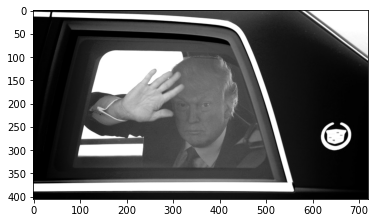

In [176]:
#deconvolution
otf_kernel = np.matrix(psf2otf(h2, (405,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(gray_trump_blurred_2)
inner =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h2, (405,720)))
plt.imshow(np.abs(np.fft.ifft2(inner)),cmap='gray')

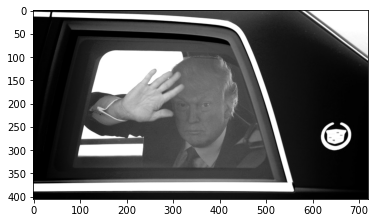

In [177]:
#deconvolution
otf_kernel = np.matrix(psf2otf(h3, (405,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(gray_trump_blurred_3)
inner =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h3, (405,720)))
plt.imshow(np.abs(np.fft.ifft2(inner)),cmap='gray')

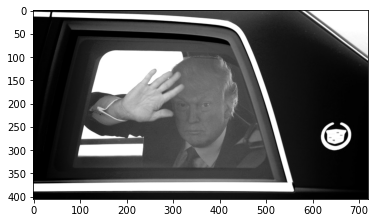

In [178]:
#deconvolution
otf_kernel = np.matrix(psf2otf(h4, (405,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(gray_trump_blurred_4)
inner =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h4, (405,720)))
plt.imshow(np.abs(np.fft.ifft2(inner)),cmap='gray')

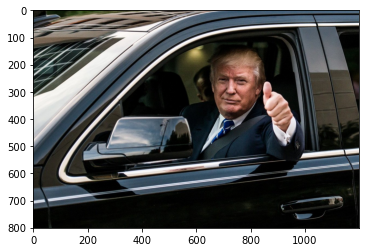

In [233]:
otf_kernel = np.matrix(psf2otf(h2,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_2[:,:,0])
inner1 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h2, (801,1200)))

otf_kernel = np.matrix(psf2otf(h2,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_2[:,:,1])
inner2 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h2, (801,1200)))

otf_kernel = np.matrix(psf2otf(h2,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_2[:,:,2])
inner3 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h2, (801,1200)))

inner1 = np.abs(np.fft.ifft2(inner1))
inner2 = np.abs(np.fft.ifft2(inner2))
inner3 = np.abs(np.fft.ifft2(inner3))

inner1 = np.abs(inner1)
inner2 = np.abs(inner2)
inner3 = np.abs(inner3)

inner1 = normalize(inner1)
inner2 = normalize(inner2)
inner3 = normalize(inner3)

needed_multi_channel_img = np.zeros((801, 1200, 3))


needed_multi_channel_img [:,:,0] = inner1
needed_multi_channel_img [:,:,1] = inner2
needed_multi_channel_img [:,:,2] = inner3
plt.imshow(needed_multi_channel_img)

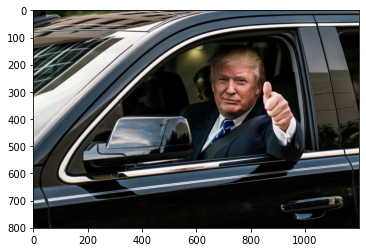

In [234]:
otf_kernel = np.matrix(psf2otf(h3,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_3[:,:,0])
inner1 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h3, (801,1200)))

otf_kernel = np.matrix(psf2otf(h3,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_3[:,:,1])
inner2 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h3, (801,1200)))

otf_kernel = np.matrix(psf2otf(h3,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_3[:,:,2])
inner3 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h3, (801,1200)))

inner1 = np.abs(np.fft.ifft2(inner1))
inner2 = np.abs(np.fft.ifft2(inner2))
inner3 = np.abs(np.fft.ifft2(inner3))

inner1 = np.abs(inner1)
inner2 = np.abs(inner2)
inner3 = np.abs(inner3)

inner1 = normalize(inner1)
inner2 = normalize(inner2)
inner3 = normalize(inner3)

needed_multi_channel_img = np.zeros((801, 1200, 3))


needed_multi_channel_img [:,:,0] = inner1
needed_multi_channel_img [:,:,1] = inner2
needed_multi_channel_img [:,:,2] = inner3
plt.imshow(needed_multi_channel_img)

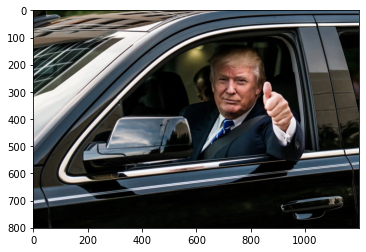

In [235]:
otf_kernel = np.matrix(psf2otf(h4,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_4[:,:,0])
inner1 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h4, (801,1200)))

otf_kernel = np.matrix(psf2otf(h4,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_4[:,:,1])
inner2 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h4, (801,1200)))

otf_kernel = np.matrix(psf2otf(h4,(801,1200)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_4[:,:,2])
inner3 =  np.multiply(otf_kernel,result_psf2otf1) / np.multiply(otf_kernel, psf2otf(h4, (801,1200)))

inner1 = np.abs(np.fft.ifft2(inner1))
inner2 = np.abs(np.fft.ifft2(inner2))
inner3 = np.abs(np.fft.ifft2(inner3))

inner1 = np.abs(inner1)
inner2 = np.abs(inner2)
inner3 = np.abs(inner3)

inner1 = normalize(inner1)
inner2 = normalize(inner2)
inner3 = normalize(inner3)

needed_multi_channel_img = np.zeros((801, 1200, 3))


needed_multi_channel_img [:,:,0] = inner1
needed_multi_channel_img [:,:,1] = inner2
needed_multi_channel_img [:,:,2] = inner3
plt.imshow(needed_multi_channel_img)

# part c

In [ ]:
import math
import numpy as np
from skimage import io
from scipy.signal import convolve2d

def compute_psnr(img1, img2):
    if isinstance(img1,str):
        img1=io.imread(img1)
    if isinstance(img2,str):
        img2=io.imread(img2)
    mse = np.mean( (img1/255. - img2/255.) ** 2 )
    if mse < 1.0e-10:
       return 1000000000000
    PIXEL_MAX = 1
    psnr = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    return mse, psnr


def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

def filter2(x, kernel, mode='same'):
    return convolve2d(x, np.rot90(kernel, 2), mode=mode)

def compute_ssim(im1, im2, k1=0.01, k2=0.03, win_size=11, L=255):
    if not im1.shape == im2.shape:
        raise ValueError("Input Imagees must have the same dimensions")
    if len(im1.shape) > 2:
        raise ValueError("Please input the images with 1 channel")

    M, N = im1.shape
    C1 = (k1*L)**2
    C2 = (k2*L)**2
    window = matlab_style_gauss2D(shape=(win_size,win_size), sigma=1.5)
    window = window/np.sum(np.sum(window))

    if im1.dtype == np.uint8:
        im1 = np.double(im1)
    if im2.dtype == np.uint8:
        im2 = np.double(im2)

    mu1 = filter2(im1, window, 'valid')
    mu2 = filter2(im2, window, 'valid')
    mu1_sq = mu1 * mu1
    mu2_sq = mu2 * mu2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = filter2(im1*im1, window, 'valid') - mu1_sq
    sigma2_sq = filter2(im2*im2, window, 'valid') - mu2_sq
    sigmal2 = filter2(im1*im2, window, 'valid') - mu1_mu2

    ssim_map = ((2*mu1_mu2+C1) * (2*sigmal2+C2)) / ((mu1_sq+mu2_sq+C1) * (sigma1_sq+sigma2_sq+C2))

    return np.mean(np.mean(ssim_map))



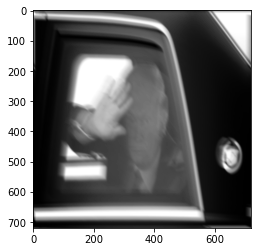

In [293]:
gray_trump = cv.resize(gray_trump,(720,720))
otf_kernel = psf2otf(h2, (720,720))
fft_image = np.fft.fft2(gray_trump)

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)


result_psf2otf = np.fft.ifft2(fft_result_psf2otf)

plt.imshow(np.abs(result_psf2otf),cmap='gray')

gray_trump_blurred_2 = np.abs(result_psf2otf)

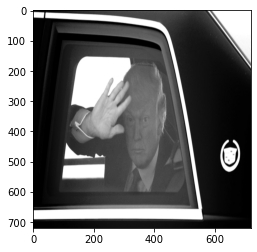

In [302]:
img = cv.resize(gray_trump_blurred_2,(720,720))
otf_kernel = np.matrix(psf2otf(h2,(720,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(img)
A = np.identity(720,dtype = float)
lr = 0.001
A_dft = np.fft.fft2(A)
regularization_part = np.multiply(np.conjugate(A_dft),A_dft)
inner =  np.multiply(otf_kernel,result_psf2otf1) / (np.multiply(otf_kernel, psf2otf(h2, (720,720)))+lr*(regularization_part))
plt.imshow(normalize(np.abs(np.fft.ifft2(inner))),cmap='gray')

In [301]:
mse, psnr = compute_psnr(normalize(np.abs(np.fft.ifft2(inner))), cv.resize(gray_trump,(720,720)))
ssim = compute_ssim(normalize(np.abs(np.fft.ifft2(inner))), cv.resize(gray_trump,(720,720)))

print('psnr:'+str(psnr)+' ssim:'+str(ssim))

psnr:6.8272555574288285 ssim:0.10637461327722103


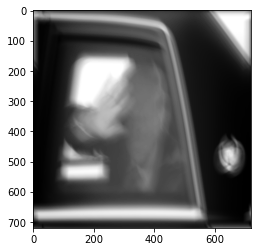

In [305]:
gray_trump = cv.resize(gray_trump,(720,720))
otf_kernel = psf2otf(h3, (720,720))
fft_image = np.fft.fft2(gray_trump)

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)


result_psf2otf = np.fft.ifft2(fft_result_psf2otf)

plt.imshow(np.abs(result_psf2otf),cmap='gray')

gray_trump_blurred_3 = np.abs(result_psf2otf)

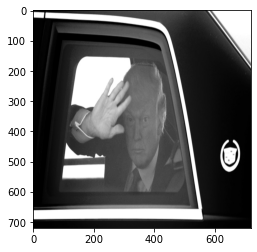

In [306]:
img = cv.resize(gray_trump_blurred_3,(720,720))
otf_kernel = np.matrix(psf2otf(h3,(720,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(img)
A = np.identity(720,dtype = float)
lr = 0.01
A_dft = np.fft.fft2(A)
regularization_part = np.multiply(np.conjugate(A_dft),A_dft)
inner =  np.multiply(otf_kernel,result_psf2otf1) / (np.multiply(otf_kernel, psf2otf(h3, (720,720)))+lr*(regularization_part))
plt.imshow(normalize(np.abs(np.fft.ifft2(inner))),cmap='gray')

In [307]:
mse, psnr = compute_psnr(normalize(np.abs(np.fft.ifft2(inner))), cv.resize(gray_trump,(720,720)))
ssim = compute_ssim(normalize(np.abs(np.fft.ifft2(inner))), cv.resize(gray_trump,(720,720)))

print('psnr:'+str(psnr)+' ssim:'+str(ssim))

psnr:6.829647494178449 ssim:0.10608614114911917


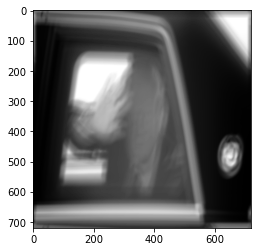

In [308]:
gray_trump = cv.resize(gray_trump,(720,720))
otf_kernel = psf2otf(h4, (720,720))
fft_image = np.fft.fft2(gray_trump)

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)


result_psf2otf = np.fft.ifft2(fft_result_psf2otf)

plt.imshow(np.abs(result_psf2otf),cmap='gray')

gray_trump_blurred_4 = np.abs(result_psf2otf)

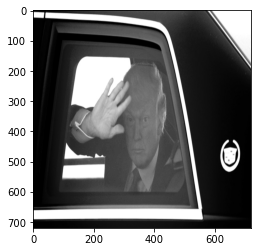

In [309]:
img = cv.resize(gray_trump_blurred_4,(720,720))
otf_kernel = np.matrix(psf2otf(h4,(720,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(img)
A = np.identity(720,dtype = float)
lr = 0.001
A_dft = np.fft.fft2(A)
regularization_part = np.multiply(np.conjugate(A_dft),A_dft)
inner =  np.multiply(otf_kernel,result_psf2otf1) / (np.multiply(otf_kernel, psf2otf(h4, (720,720)))+lr*(regularization_part))
plt.imshow(normalize(np.abs(np.fft.ifft2(inner))),cmap='gray')

In [310]:
print('psnr:'+str(psnr)+' ssim:'+str(ssim))

psnr:6.829647494178449 ssim:0.10608614114911917


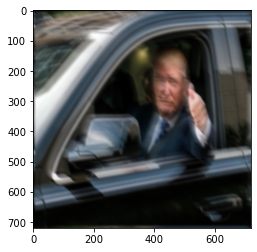

In [313]:
img = cv.resize(colored_trump,(720,720))
otf_kernel = psf2otf(h2,(720,720))
fft_image = np.fft.fft2(img[:,:,0])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf0 = np.fft.ifft2(fft_result_psf2otf)

otf_kernel = psf2otf(h2,(720,720))
fft_image = np.fft.fft2(img[:,:,1])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf1 = np.fft.ifft2(fft_result_psf2otf)

otf_kernel = psf2otf(h2,(720,720))
fft_image = np.fft.fft2(img[:,:,2])

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)

result_psf2otf2 = np.fft.ifft2(fft_result_psf2otf)


r_ch = np.abs(result_psf2otf0)
g_ch = np.abs(result_psf2otf1)
b_ch = np.abs(result_psf2otf2)

def normalize(image):
    return (image-image.min())/(image.max()-image.min())


r_ch = normalize(r_ch)
g_ch = normalize(g_ch)
b_ch = normalize(b_ch)

needed_multi_channel_img = np.zeros((720, 720, 3))



needed_multi_channel_img [:,:,0] = r_ch
needed_multi_channel_img [:,:,1] = g_ch
needed_multi_channel_img [:,:,2] = b_ch
plt.imshow(needed_multi_channel_img)

colored_trump_blurred_2 = needed_multi_channel_img

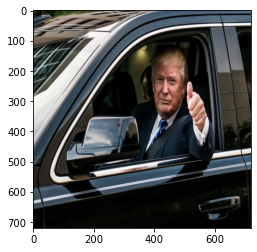

In [319]:
otf_kernel = np.matrix(psf2otf(h4,(720,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_2[:,:,0])

A = np.identity(720,dtype = float)
lr = 0.001
A_dft = np.fft.fft2(A)
regularization_part = np.multiply(np.conjugate(A_dft),A_dft)

inner1 =  np.multiply(otf_kernel,result_psf2otf1) / (np.multiply(otf_kernel, psf2otf(h2, (720,720))) + lr*(regularization_part))

otf_kernel = np.matrix(psf2otf(h2,(720,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_2[:,:,1])
inner2 =  np.multiply(otf_kernel,result_psf2otf1) /(np.multiply(otf_kernel, psf2otf(h2, (720,720))) + lr*(regularization_part))

otf_kernel = np.matrix(psf2otf(h2,(720,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(colored_trump_blurred_2[:,:,2])
inner3 =  np.multiply(otf_kernel,result_psf2otf1) / (np.multiply(otf_kernel, psf2otf(h2, (720,720))) + lr*(regularization_part))

inner1 = np.abs(np.fft.ifft2(inner1))
inner2 = np.abs(np.fft.ifft2(inner2))
inner3 = np.abs(np.fft.ifft2(inner3))

inner1 = np.abs(inner1)
inner2 = np.abs(inner2)
inner3 = np.abs(inner3)

inner1 = normalize(inner1)
inner2 = normalize(inner2)
inner3 = normalize(inner3)

needed_multi_channel_img = np.zeros((720, 720, 3))


needed_multi_channel_img [:,:,0] = inner1
needed_multi_channel_img [:,:,1] = inner2
needed_multi_channel_img [:,:,2] = inner3
plt.imshow(needed_multi_channel_img)

In [321]:
mse, psnr = compute_psnr(inner1, cv.resize(colored_trump[:,:,0],(720,720)))
ssim = compute_ssim(inner1, cv.resize(colored_trump[:,:,0],(720,720)))

print('psnr:'+str(psnr)+' ssim:'+str(ssim))

psnr:8.373038317045884 ssim:0.09488997094251121


In [322]:
mse, psnr = compute_psnr(inner2, cv.resize(colored_trump[:,:,0],(720,720)))
ssim = compute_ssim(inner2, cv.resize(colored_trump[:,:,0],(720,720)))

print('psnr:'+str(psnr)+' ssim:'+str(ssim))

psnr:8.372173477751248 ssim:0.0954860418837742


In [323]:
mse, psnr = compute_psnr(inner3, cv.resize(colored_trump[:,:,0],(720,720)))
ssim = compute_ssim(inner3, cv.resize(colored_trump[:,:,0],(720,720)))

print('psnr:'+str(psnr)+' ssim:'+str(ssim))

psnr:8.371963091730057 ssim:0.09523945249830623


# part d

In [337]:
LAPLACIAN = np.array([[ 0, -1,  0],
                      [-1,  4, -1],
                      [ 0, -1,  0]])

reg_op = psf2otf(LAPLACIAN,(720,720))

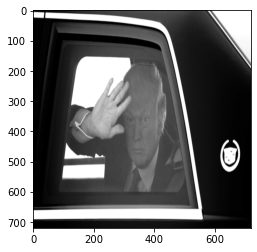

In [338]:
img = cv.resize(gray_trump_blurred_4,(720,720))
otf_kernel = np.matrix(psf2otf(h4,(720,720)))
otf_kernel = np.conjugate(otf_kernel)
result_psf2otf1 = np.fft.fft2(img)

lr = 0.001

inner =  np.multiply(otf_kernel,result_psf2otf1) / (np.multiply(otf_kernel, psf2otf(h4, (720,720)))+lr*(np.multiply(np.conjugate(reg_op),reg_op)))
plt.imshow(normalize(np.abs(np.fft.ifft2(inner))),cmap='gray')

In [341]:
mse, psnr = compute_psnr(normalize(np.abs(np.fft.ifft2(inner))), cv.resize(gray_trump,(720,720)))
ssim = compute_ssim(normalize(np.abs(np.fft.ifft2(inner))), cv.resize(gray_trump,(720,720)))

print('psnr:'+str(psnr)+' ssim:'+str(ssim))

psnr:6.829652904609301 ssim:0.10608697193806389


# part e

# psfFT = blurredImageFT / originalImageFT

# psf = inverseFT(blurredImageFT / originalImageFT)

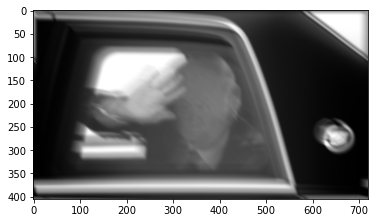

In [344]:
otf_kernel = psf2otf(h2, (405,720))
fft_image = np.fft.fft2(gray_trump)

fft_result_psf2otf = np.multiply(otf_kernel, fft_image)


result_psf2otf = np.fft.ifft2(fft_result_psf2otf)

plt.imshow(np.abs(result_psf2otf),cmap='gray')

gray_trump_blurred_2 = np.abs(result_psf2otf)

In [347]:
from scipy.fftpack import fftn, ifftn
def otf2psf(otf, psf_size):
    # calculate psf from otf with size <= otf size
    
    if otf.any(): # if any otf element is non-zero
        # calculate psf     
        psf = ifftn(otf)
        # this condition depends on psf size    
        num_small = np.log2(otf.shape[0])*4*np.spacing(1)    
        if np.max(abs(psf.imag))/np.max(abs(psf)) <= num_small:
            psf = psf.real 
        
        # circularly shift psf
        psf = np.roll(psf, int(np.floor(psf_size[0]/2)), axis=0)    
        psf = np.roll(psf, int(np.floor(psf_size[1]/2)), axis=1) 
        
        # crop psf
        psf = psf[0:psf_size[0], 0:psf_size[1]]
    else: # if all otf elements are zero
        psf = np.zeros(psf_size)
    return psf

In [345]:
otf = np.fft.fft2(gray_trump_blurred_2)/np.fft.fft2(gray_trump)

In [349]:
new_psf = otf2psf(otf,(45,45))

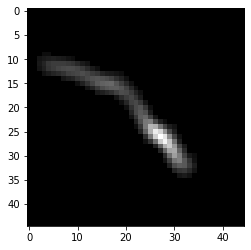

In [351]:
plt.imshow(new_psf,cmap='gray')

In [353]:
mse = np.sum((h2 - new_psf)**2)


rmse = np.sqrt(mse)

In [355]:
print('rmse:'+str(rmse))

rmse:1.9171469854726326e-11
